In [7]:
import pandas as pd
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
numsamples, numfeatures = iris.data.shape
print(numsamples)
print(numfeatures)
print(list(iris.target_names))

150
4
['setosa', 'versicolor', 'virginica']


Scikit learn datasets are stored as ***numpy arrays***. 
We use *pandas dataframes*  for data analysis and visualization. 
The scikit-learn dataset is split into predictor and target columns. We bring them together with the numpy concatenation function `(np.c_)` before conversion. 

In [3]:
type(iris)

sklearn.utils.Bunch

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

# Plot the data

Text(0, 0.5, 'Sepal width')

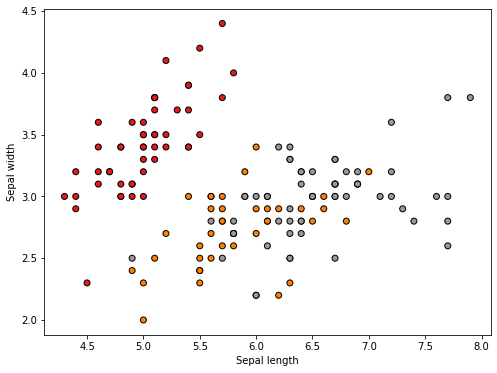

In [5]:
import matplotlib.pyplot as plt

X = iris.data 
y = iris.target


plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
# we are only using the sepal length/width
ax = plt.subplot(111)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
#ax.legend()
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

The target column, according to the scikit-learn documentation, https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html, consists of three different iris flowers:  **setosa**, **versicolor**, and **virginica**. There are 150 rows with 50 samples of each. 

As we have discussed in class we need to split the data into train and test. 

# XGBOOST Classification 

### 1. Convert to suitable format

In [8]:
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


### 2. Split into train and Test

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state=2)

### 3. Create and fit an XGBoost Classifier

In [14]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

## Here we initialize XGBoost with "hyperparameters"
## for our purposed just stick with the default ones. 
## If you want to play around with others you can read 
## more about it in https://xgboost.readthedocs.io/en/latest/parameter.html

# xgb = XGBClassifier(booster='gbtree', objective='multi:softprob', 
#                     max_depth=6, learning_rate=0.1, n_estimators=10, 
#                     random_state=2, n_jobs=-1)

xgb = XGBClassifier( max_depth=6, n_estimators=5, 
                    random_state=2)

In [15]:
## now we will 'fit' the classifier to the data

model = xgb.fit(X_train, y_train)

### 4. Predict values on the test set

In [16]:
## now we will predict values
y_pred = xgb.predict(X_test)


### 5. Measure *accuracy*

In [17]:
## check our score
score = accuracy_score(y_pred, y_test)
print(score)

0.9736842105263158


Which features are important?

In [18]:
print(model.feature_importances_)
print(iris['feature_names'])

[0.         0.         0.24403754 0.7559625 ]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


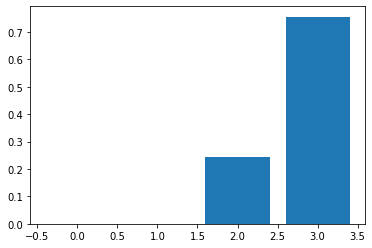

In [19]:
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

# XGBoost Regression


In [20]:
# load the boston housing dataset

from sklearn.datasets import load_boston
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [28]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
housing

{'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars

In [29]:
numsamples, numfeatures = housing.data.shape
print(numsamples)
print(numfeatures)
print(list(housing.target_names))

20640
8
['MedHouseVal']


In [30]:
type(housing)

sklearn.utils.Bunch

In [31]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [ ]:
# as you can see we have 506 rows with 13 columns
print(housing.data.shape)

(20640, 8)


In [36]:
# These are our features

print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [37]:
# Full Description
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

### 1. Convert to suitable format

In [39]:
housing_df = pd.DataFrame(data=np.c_[housing['data'], housing['target']], columns= housing['feature_names'] + ['target'])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### 2.  Split into train and test

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(housing['data'], housing['target'], random_state=2)

In [41]:
X_train.shape

(15480, 8)

In [42]:
X_test.shape

(5160, 8)

### 3. Create an XGBoot Regressor

In [43]:
from xgboost import XGBRegressor
xg_reg = XGBRegressor(max_depth=5, n_estimators=10)

In [44]:
model = xgb.fit(X_train, y_train)

### 4. Predict values on the test set




In [45]:
y_pred = xgb.predict(X_test)

In [47]:
print(y_pred)

[5.00001 1.621   1.      ... 0.675   2.051   5.00001]


### 5.  Measure accuracy



In [46]:
## we will use the mean squared error
import sklearn.metrics as skmetrics

rmse = np.sqrt(skmetrics.mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

RMSE: 1.6002547690127658
